In [4]:
import pandas as pd
import numpy as np

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/processed/bank_final.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group,balance_category,contact_intensity
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,Middle-Aged,Medium,Low
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1,Middle-Aged,Low,Low
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1,Adult,Medium,Low
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1,Middle-Aged,Medium,Low
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1,Middle-Aged,Low,Low


In [5]:
# Define features and target
X = df.drop(columns=['deposit'])
y = df['deposit']


In [6]:
# Encode categorical features
categorical_cols = X.select_dtypes(include='object').columns

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


In [10]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [9]:
accuracy = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf)
}
accuracy


{'Logistic Regression': 0.8311688311688312,
 'Decision Tree': 0.7975817286162113,
 'Random Forest': 0.8575906851768921}

Logistic Regression Confusion Matrix:
 [[1004  171]
 [ 206  852]] 



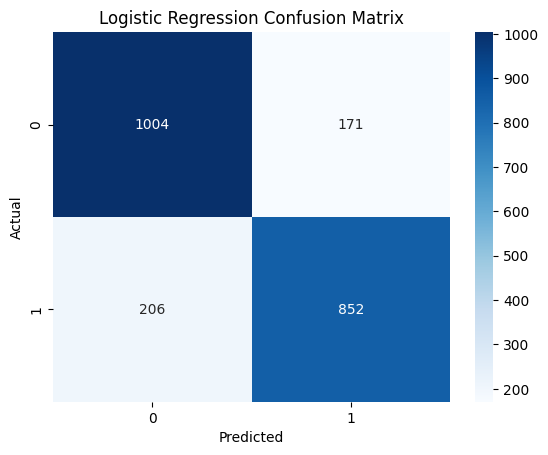

Decision Tree Confusion Matrix:
 [[963 212]
 [240 818]] 



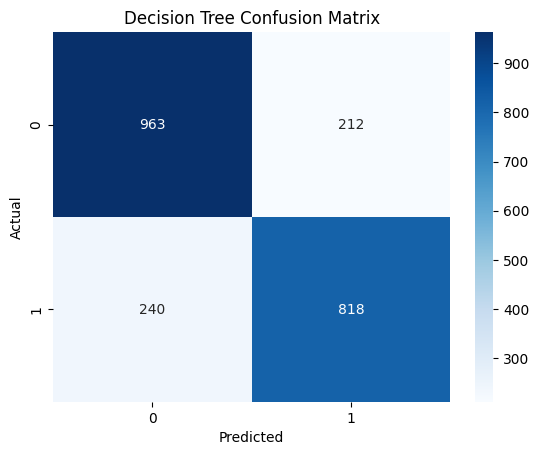

Random Forest Confusion Matrix:
 [[979 196]
 [122 936]] 



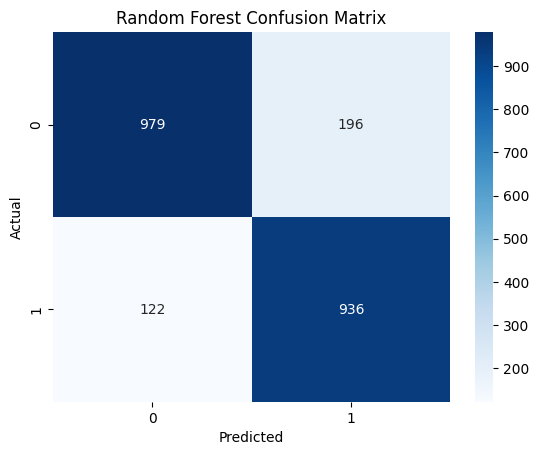

In [12]:
models_preds = {'Logistic Regression': y_pred_lr,
                'Decision Tree': y_pred_dt,
                'Random Forest': y_pred_rf}

for model, y_pred in models_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model} Confusion Matrix:\n", cm, "\n")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [11]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_rf)]
})
comparison


,Model,Accuracy
0,Logistic Regression,0.831169
1,Decision Tree,0.797582
2,Random Forest,0.857591


### Best Model Selection

- **Random Forest** is chosen as the best model:
  - Highest accuracy and F1-Score
  - Handles nonlinear relationships and feature interactions
  - Less prone to overfitting than a single decision tree
  - Works well with both categorical and numerical features


In [13]:
# Display first 20 predictions
test_results = pd.DataFrame({
    'Actual': y_test[:20].values,
    'Predicted': y_pred_rf[:20]
})
test_results


,Actual,Predicted
0,0,1
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,1,0
8,1,1
9,1,1


In [13]:
# Sample customer profile
sample = {
    "age": 42,
    "job": "management",
    "marital": "married",
    "education": "tertiary",
    "balance": 6000,
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "campaign": 2,
    "poutcome": "success"
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample])

# Apply feature engineering
sample_df['age_group'] = sample_df['age'].apply(lambda x: 'Young Adult' if x<=30 else ('Adult' if x<=45 else ('Middle-Aged' if x<=60 else 'Senior')))
sample_df['balance_category'] = sample_df['balance'].apply(lambda x: 'Low' if x<1000 else ('Medium' if x<=5000 else 'High'))
sample_df['contact_intensity'] = sample_df['campaign'].apply(lambda x: 'Low' if x<=2 else ('Medium' if x<=5 else 'High'))

# Drop raw columns if needed and encode categorical features
sample_df_encoded = pd.get_dummies(sample_df, columns=['job','marital','education','housing','loan','contact','poutcome','age_group','balance_category','contact_intensity'], drop_first=True)

# Align columns with training data
sample_df_encoded = sample_df_encoded.reindex(columns=X_train.columns, fill_value=0)

# Scale features
sample_scaled = scaler.transform(sample_df_encoded)

# Predict
prediction = rf.predict(sample_scaled)[0]
prediction_prob = rf.predict_proba(sample_scaled)[0][1]

print(f"Predicted Deposit: {prediction} (1=Yes, 0=No)")
print(f"Probability of subscription: {prediction_prob:.2f}")


Predicted Deposit: 0 (1=Yes, 0=No)
Probability of subscription: 0.33


d:\WORK\Projects\customer-purchase-prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\WORK\Projects\customer-purchase-prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
import joblib
import os

# Make sure folder exists at root
if not os.path.exists("../models"):  # "../" because notebooks/ is inside root
    os.makedirs("../models")

# Save trained objects

joblib.dump(X_train.columns, "../models/X_train_columns.pkl")


['../models/X_train_columns.pkl']

In [39]:

joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

In [34]:
# Save model
joblib.dump(rf, "../models/random_forest_model.pkl")

['../models/random_forest_model.pkl']

In [35]:
# Inside 05_modeling.ipynb or train_model.py
from imblearn.over_sampling import SMOTE

# Assume X_train, y_train already prepared
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())


Before SMOTE: deposit
0    4698
1    4231
Name: count, dtype: int64
After SMOTE: deposit
0    4698
1    4698
Name: count, dtype: int64


In [36]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train_res, y_train_res, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.85531915 0.84938797 0.84832358 0.8430016  0.85790314]
Mean CV accuracy: 0.8507870868388572


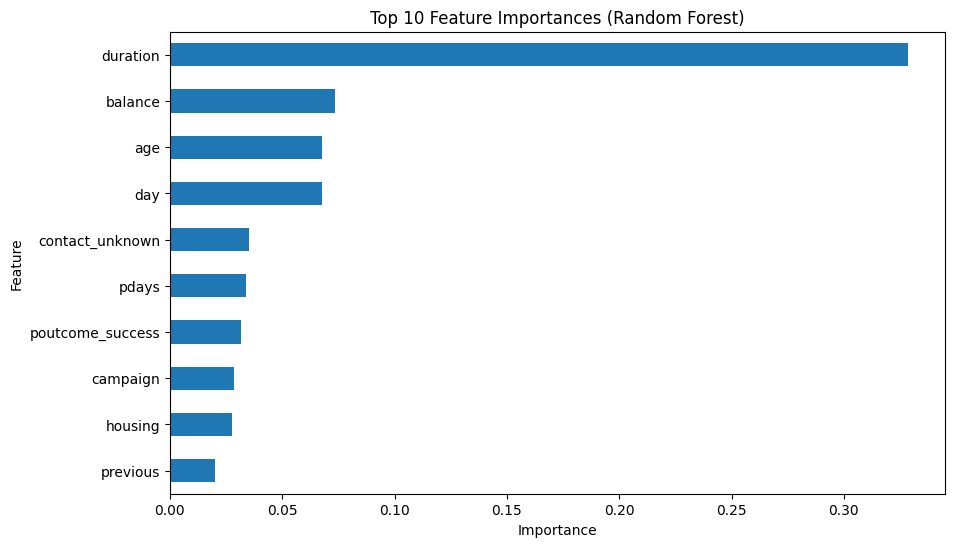

In [37]:
import matplotlib.pyplot as plt

# Train on balanced data
rf.fit(X_train_res, y_train_res)

# Feature importance
importances = rf.feature_importances_
features = X_train.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
feat_importance.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()
